In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
from numpy import linalg
from numpy import var
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import statistics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn import naive_bayes
import nltk
from nltk.corpus import stopwords
import csv
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.lancaster import LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import json
import matplotlib.pyplot as plt
from sklearn import metrics

In [3]:
import io

from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("russian")
stop_words = set(stopwords.words('russian'))

some_new_words = ['свой', 'мой', 'твой', 'такое', 'такая', 'людмила', 'люда', 'николай', 'каждый', 'вообще', 'максим', 'который', 'которое', 'которая', 'которые', 'это', 'просто', 'ольга', 'алексей', 'александр', 'екатерина', 'дмитрий', 'анастасия', 'даниил', 'андрей', 'сергей', 'олег']

from string import digits
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)


with io.open('posts_comments_2.json', encoding='utf-8') as json_data:
    comments = list()
    for line in json_data:
        comment = json.loads(line)['text'].lower()
        comment = re.sub('[!@#$&=_\?:\.\)\(\[\]|id"/]', '', comment)
        comment = re.sub('[,-]', ' ', comment)
        comment = re.sub(r'\d+', '', comment)
        comment = re.sub('[a-zA-Z]', '', comment)
        comment = re.sub('[ё]', 'е', comment)
        comment = re.sub('[🤣🤦🤗🤢🤔☝🤘✌]', '', comment)
        comment = re.sub('[\u200d♂️]', '', comment)
        comment = re.sub('[\u200b♂️]', '', comment)
        comment = emoji_pattern.sub(r'', comment)  
        comment = word_tokenize(comment)
        comment = [word for word in comment if word not in stop_words]
        comment = [word for word in comment if word not in some_new_words]
        comment = [stemmer.stem(i) for i in comment]
        comment = " ".join(comment)
        comments.append(comment)
        
comments = [i for i in comments if i != '']

In [4]:
stop_words

{'а',
 'без',
 'более',
 'больше',
 'будет',
 'будто',
 'бы',
 'был',
 'была',
 'были',
 'было',
 'быть',
 'в',
 'вам',
 'вас',
 'вдруг',
 'ведь',
 'во',
 'вот',
 'впрочем',
 'все',
 'всегда',
 'всего',
 'всех',
 'всю',
 'вы',
 'где',
 'да',
 'даже',
 'два',
 'для',
 'до',
 'другой',
 'его',
 'ее',
 'ей',
 'ему',
 'если',
 'есть',
 'еще',
 'ж',
 'же',
 'за',
 'зачем',
 'здесь',
 'и',
 'из',
 'или',
 'им',
 'иногда',
 'их',
 'к',
 'как',
 'какая',
 'какой',
 'когда',
 'конечно',
 'кто',
 'куда',
 'ли',
 'лучше',
 'между',
 'меня',
 'мне',
 'много',
 'может',
 'можно',
 'мой',
 'моя',
 'мы',
 'на',
 'над',
 'надо',
 'наконец',
 'нас',
 'не',
 'него',
 'нее',
 'ней',
 'нельзя',
 'нет',
 'ни',
 'нибудь',
 'никогда',
 'ним',
 'них',
 'ничего',
 'но',
 'ну',
 'о',
 'об',
 'один',
 'он',
 'она',
 'они',
 'опять',
 'от',
 'перед',
 'по',
 'под',
 'после',
 'потом',
 'потому',
 'почти',
 'при',
 'про',
 'раз',
 'разве',
 'с',
 'сам',
 'свою',
 'себе',
 'себя',
 'сейчас',
 'со',
 'совсем',
 'так

In [5]:
comments

['ван корн соглас большинств случа виноват пешеход езж год недел набега км имел пробл пешеход еха прав ряд прозева выходя фур старушк благ еха оттормоз незадач виноват водител фур закр знак пешеходн переход разметк стерл',
 'ван мотоцикл вес кг плюс плюс пассажир',
 'старушк буд выж ум выход фур снача показа аккуратн посмотрел останов шла',
 'город гоня счита норм',
 'ед гольф лошадьм трасс част испытыва сложност обогна тихоход отказа лишн сотн',
 'куп хотел вполн довол плач рубл налог год кстат счита ком долж',
 'ван начина разниц случа дтп счита старушк выж ум счита соблюда п пдд имен учел дорожн обстановк переоцен сво возможн выбра неверн скоростн реж позвол избежа дтп',
 'ван тихоход скольк секрет',
 'ван например рул лет ваш стран точк зрен поддержива сегодн водител завтр пошел ребенк прогулк пешеходв передвига авт плач транспортн налог тысрубл возника желан ком рассказыва чьи дорог полн бред дорог стран общ транспортн налог покрыва стоимост ремонт прокладк нов дорог остальн бюдже

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=10)

tfidf_matrix = tfidf_vectorizer.fit_transform(comments) 

print(tfidf_matrix.shape)

(11489, 1680)


K-means

In [9]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

num_clusters = 4
model = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=100, n_init=1)
model.fit(tfidf_matrix)
    
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names()
for i in range(num_clusters):
    print("Cluster %d:" % i,)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind],)

Top terms per cluster:
Cluster 0:
 категор
 нос
 муж
 прост
 дан
 сво
 ясн
 коммент
 комментар
 комментатор
Cluster 1:
 переезд
 час
 простоя
 стоя
 поезд
 постоя
 жд
 закр
 мост
 попа
Cluster 2:
 лет
 назад
 одн
 прошл
 ан
 машин
 стаж
 очен
 нарушен
 прав
Cluster 3:
 машин
 так
 прав
 люд
 сво
 сам
 водител
 дорог
 сто
 езд


In [10]:
metrics.silhouette_score(tfidf_matrix, model.labels_)

0.022200617655955483

In [11]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(tfidf_matrix)
    inertia.append(np.sqrt(kmeans.inertia_))

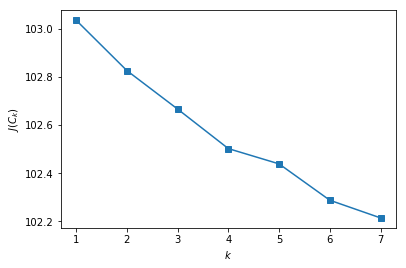

In [12]:
plt.plot(range(1, 8), inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')
plt.show()

Hierarchical clustering

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

In [14]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=None);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

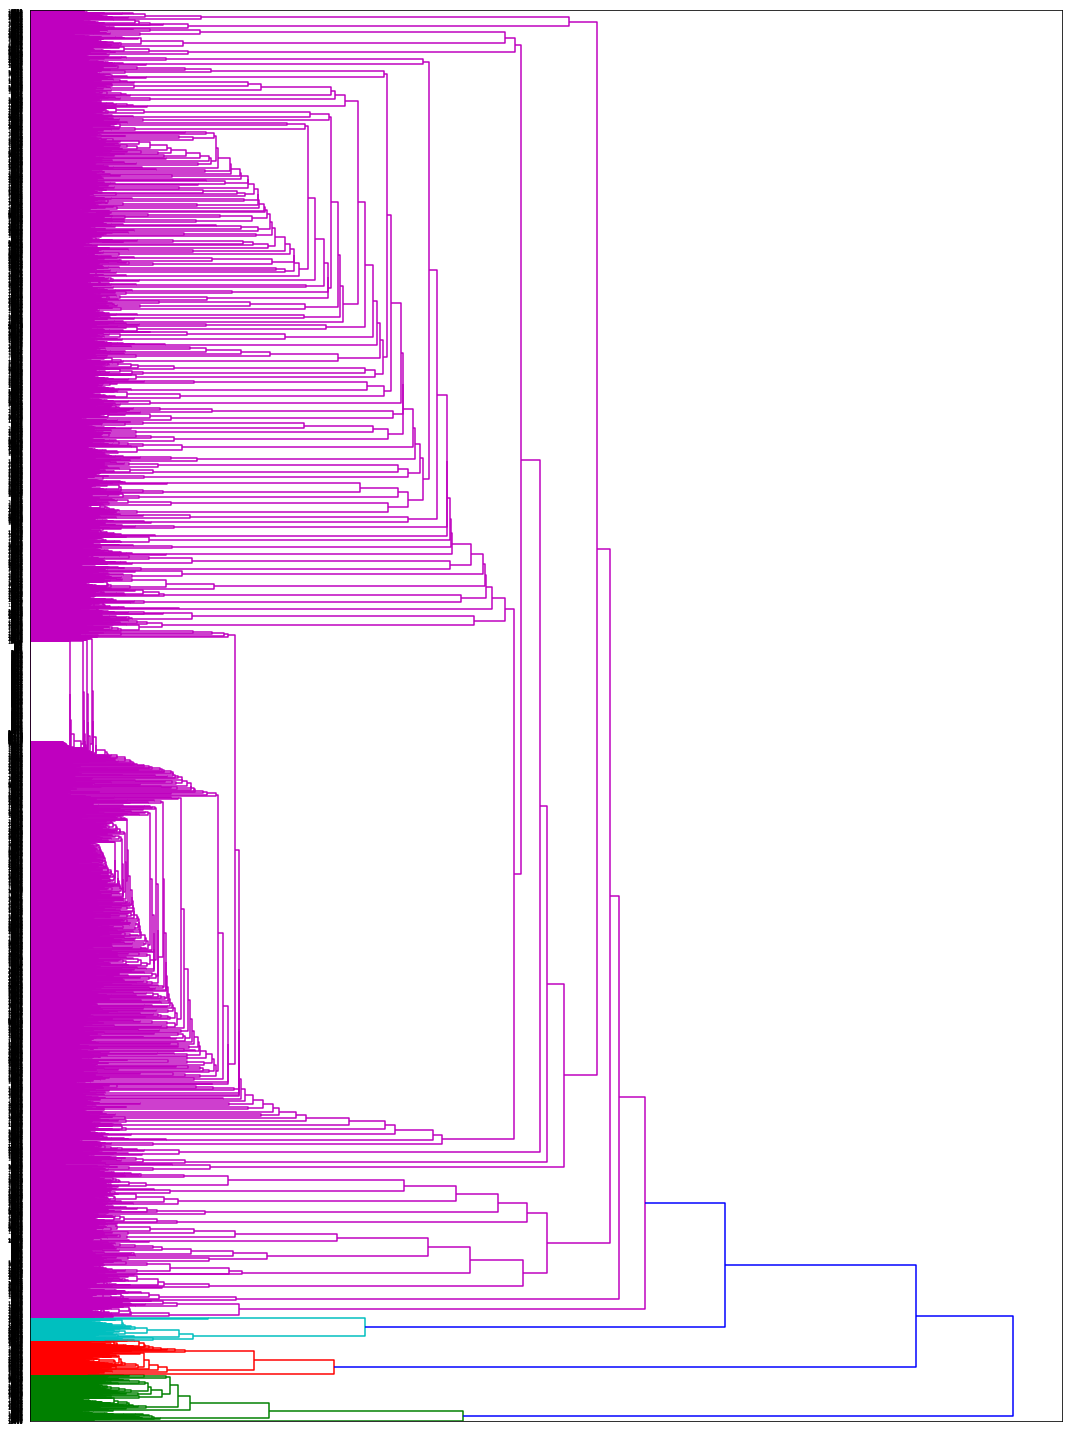

In [15]:
plt.show()

In [16]:
aggl = AgglomerativeClustering(n_clusters=4)
aggl.fit(tfidf_matrix.toarray())

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=4,
            pooling_func=<function mean at 0x00000184D07B1488>)

In [17]:
metrics.silhouette_score(tfidf_matrix, aggl.labels_)

0.02418064401647986

In [20]:
print(aggl.labels_)

[2 2 2 ..., 2 2 2]


In [28]:
x = pd.DataFrame({'comment':comments, 'cluster':aggl.labels_})

#wfpc = x.groupby('cluster').sum()
#print(wfpc.loc[1,10])
print(x)

       cluster                                            comment
0            2  ван корн соглас большинств случа виноват пешех...
1            2             ван мотоцикл вес кг плюс плюс пассажир
2            2  старушк буд выж ум выход фур снача показа акку...
3            2                              город гоня счита норм
4            2  ед гольф лошадьм трасс част испытыва сложност ...
5            2  куп хотел вполн довол плач рубл налог год кста...
6            2  ван начина разниц случа дтп счита старушк выж ...
7            2                          ван тихоход скольк секрет
8            2  ван например рул лет ваш стран точк зрен подде...
9            2  фур едут трасс зачаст хот город реж молч погре...
10           2  стас удар сильн бок скат капот наде ушиб обошл...
11           2  перечита поймет защища водител дан случа описы...
12           2                                        капита плат
13           2       экипаж написа позвон поеха информац ког друг
14        

In [73]:
fst = x[x.cluster==1]
scnd = x[x.cluster==2]
thrd = x[x.cluster==3]
frth = x[x.cluster==0]

In [76]:
comments1 = list()
comments2 = list()
comments3 = list()
comments4 = list()
for line in fst.comment:
    comments1.append(line)
    
for line in scnd.comment:
    comments2.append(line)
    
for line in thrd.comment:
    comments3.append(line)
    
for line in frth.comment:
    comments4.append(line)
   

In [85]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=5)
tfidf_matr1 = tfidf_vectorizer.fit_transform(comments1)  
indices = np.argsort(tfidf_vectorizer.idf_)[::-1]
features = tfidf_vectorizer.get_feature_names()
top_n = 10
tf = [features[i] for i in indices[:top_n]]
print(tf)

['супр', 'жалк']


In [86]:
tfidf_matr2 = tfidf_vectorizer.fit_transform(comments2)
indices = np.argsort(tfidf_vectorizer.idf_)[::-1]
features = tfidf_vectorizer.get_feature_names()
top_n = 10
tf = [features[i] for i in indices[:top_n]]
print(tf)

['поработа', 'предостав', 'вылеза', 'жеч', 'тож', 'приезд', 'приедет', 'вылета', 'блок', 'залива']


In [91]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2)
tfidf_matr3 = tfidf_vectorizer.fit_transform(comments3)
indices = np.argsort(tfidf_vectorizer.idf_)[::-1]
features = tfidf_vectorizer.get_feature_names()
top_n = 10
tf = [features[i] for i in indices[:top_n]]
print(tf)

['сам', 'порядк', 'пальт', 'охраня', 'номер', 'бел', 'сто', 'так']


In [92]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=10)
tfidf_matr4 = tfidf_vectorizer.fit_transform(comments4)
indices = np.argsort(tfidf_vectorizer.idf_)[::-1]
features = tfidf_vectorizer.get_feature_names()
top_n = 10
tf = [features[i] for i in indices[:top_n]]
print(tf)

['слав', 'машин', 'да', 'нашл', 'жив', 'бог']
